In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [9]:
# Significance level  (α)
alpha = 0.05  # Example significance level (5%)

## Calculate z-critical

In [10]:
# Calculate z-critical value for a one-tailed test (left-tailed)
z_critical_left = stats.norm.ppf(alpha)
print("Z-Critical Value (Left-tailed):", z_critical_left)

Z-Critical Value (Left-tailed): -1.6448536269514729


In [11]:
# Calculate z-critical value for a one-tailed test (right-tailed)
z_critical_right = stats.norm.ppf(1 - alpha)
print("Z-Critical Value (Right-tailed):", z_critical_right)

Z-Critical Value (Right-tailed): 1.6448536269514722


In [12]:
# Calculate z-critical value for a two-tailed test
z_critical_two_tailed = stats.norm.ppf(1 - alpha/2)
print("Z-Critical Value (Two-tailed):", z_critical_two_tailed)

Z-Critical Value (Two-tailed): 1.959963984540054


In [ ]:
margin_of_error = z

## Calculate p-critical

In [7]:
# Calculate p-critical value for a two-tailed test
p_critical_two_tailed = 1 - alpha
print("P-Critical Value (Two-tailed):", p_critical_two_tailed)

P-Critical Value (Two-tailed): 0.95


In [8]:
# Calculate p-critical value for a one-tailed test
p_critical_one_tailed = 1 - alpha/2
print("P-Critical Value (One-tailed):", p_critical_one_tailed)

P-Critical Value (One-tailed): 0.975


## Z-Test

In [34]:
from numpy.random import randn
population =randn(1000)

C:\Users\satee\AppData\Local\Temp\ipykernel_31740\2958836585.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(population)


<Axes: ylabel='Density'>

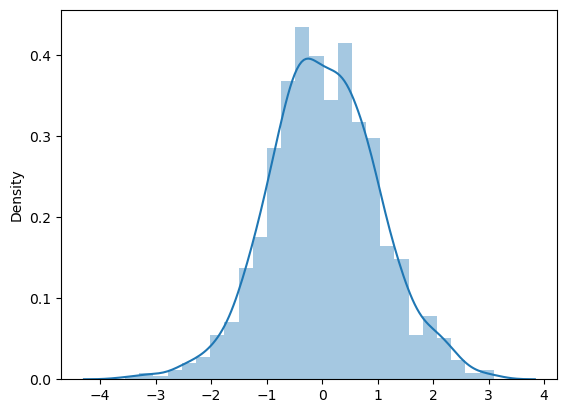

In [35]:
sns.distplot(population)

In [36]:
np.mean(population), np.std(population)

(0.031430812324097, 0.9829216678272427)

In [38]:
# Assume 
null_mean = 0.05

# if pvalue <=0.05 ==> reject null hypothesis
# if pvalue > 0.05 ==> Fail to reject null hypothesis

from statsmodels.stats.weightstats import ztest

In [40]:
zscore , pvalue = ztest(
    x1 = population, x2=None, value=0, 
    alternative='larger', 
    usevar='pooled',
    ddof=1.0)

In [41]:
zscore 

1.010693425498229

In [42]:
pvalue

0.15608159235036223

In [43]:
if pvalue <= 0.05 :
    print('Reject the Null Hypotesis  H0')
else:
    print('Fail to reject the  Null Hypotesis  H0')

Fail to reject the  Null Hypotesis  H0


In [44]:
from scipy.stats import norm

def z_test(sample_mean, population_stddev, sample_size, population_mean, alpha):
    # Calculate the z-score
    z = (sample_mean - population_mean) / (population_stddev / (sample_size ** 0.5))
    
    # Calculate the p-value
    p_value = norm.cdf(z)  # For a one-tailed test
    
    # Calculte the z-critical
    zcritical = norm.ppf(1-alpha)
    
     # Determine if null hypothesis can be rejected
    if z < zcritical:
        print('')
    else:
        print('')
    
    
    # Determine if null hypothesis can be rejected
    if p_value < alpha:
        return True, z, p_value
    else:
        return False, z, p_value

# Example usage:
sample_mean = 12.5  # Sample mean
population_stddev = 3.5  # Population standard deviation
sample_size = 100  # Sample size
population_mean = 12  # Population mean under null hypothesis
alpha = 0.05  # Significance level

reject_null, z_score, p_value = z_test(sample_mean, population_stddev, sample_size, population_mean, alpha)
print("Null Hypothesis Rejected:", reject_null)
print("Z-score:", z_score)
print("P-value:", p_value)


Null Hypothesis Rejected: False
Z-score: 1.4285714285714286
P-value: 0.9234362744901652


In [45]:
z_test(sample_mean =100, population_stddev = 16, sample_size=50, population_mean=90, alpha=0.05)

(False, 4.419417382415922, 0.9999950516326874)

# T-test

ss < 30 or sigma of populataion is not given

- one sample t test (w.r.t one independent  sample)
- two sample t test (w.r.t two independent  sample)
- paired t test (two samples from same population from different time interval)

### one Sample  T-Test

In [52]:
population_mean = 10
population_stddev = 50
population_size = 50
population = np.random.normal(population_mean, population_stddev, population_size).astype(int)
population

array([   3,   24,  -13,  -62,  -44,   77,  -16,    7,   -5,  -32,    9,
       -103,   -8,   28,   40,   93,  -31,   73,  -25,   42,   67,  -20,
         48,   -8,    0,   33,   94,   82,   26,   35,   47,    9,   -4,
        -84,  -26,   31,    1,   93,   32,  -27,   58,   -1,  -54,  -20,
         28,    2,  -18,  -24,  -82,   17])

In [53]:
popultation = np.random.randint(10,50,50)
population

array([   3,   24,  -13,  -62,  -44,   77,  -16,    7,   -5,  -32,    9,
       -103,   -8,   28,   40,   93,  -31,   73,  -25,   42,   67,  -20,
         48,   -8,    0,   33,   94,   82,   26,   35,   47,    9,   -4,
        -84,  -26,   31,    1,   93,   32,  -27,   58,   -1,  -54,  -20,
         28,    2,  -18,  -24,  -82,   17])

In [56]:
population = np.arange(1, 101)
score1 = np.random.choice(population,20)
score1

array([ 87,  64,  66,  82,  23,  13,  35,  44,  15,  44,  51,   3,  52,
        95,  38, 100,  43,  44,  70,   5])

In [57]:
population = np.arange(1, 101)
score2 = np.random.choice(population,20)
score2

array([42, 89, 99, 55, 98, 67, 40, 45,  4, 56, 90, 98, 98, 23, 84,  9, 58,
       82, 47, 57])

In [58]:
np.mean(score1), np.mean(score2)

(48.7, 62.05)

In [60]:
stats.ttest_ind(score1,score2)

Ttest_indResult(statistic=-1.4386620400365315, pvalue=0.15843243538958654)

if  pvalue > 0.05 : fail to reject the H0

### paired t test >> two sample from same poplution at different time interval